<font size="3">
Σκοπός αυτής της άσκησης είναι να εξοικειωθείτε με τις έννοιες και τις λειτουργίες που σχετίζονται με το FFT και το iFFT.
    <ol>
        <li>Στις ηχογραφήσεις που κάνατε στην προηγούμενη άσκηση, εφαρμόστε το FFT και δείτε αν οι συχνότητες που παίρνετε συμφωνούν με τις εκτιμήσεις που κάνατε "με το μάτι" για τη συχνότητα του σήματος πάνω στην κυματομορφή.
        <li>Δημιουργήστε ένα τεχνητό σήμα ως άθροισμα δύο ημιτόνων συχνοτήτων 50 και 70 Hz, θεωρώντας μια συχνότητα δειγματοληψίας 44100.
            <ol>
                <li>Ποιο είναι το ελάχιστο μέγεθος παραθύρου (σε δύναμη του 2) που χρειάζεται να εφαρμόστε στο FFT για να έχετε τις δύο αυτές συχνότητας σε διαφορετικά "κουτάκια" FFT (FFT bins);
                <li>Αν ήταν μισή η συχνότητα δειγματοληψίας, ποιο θα ήταν το ελάχιστο αυτό μέγεθος;
            </ol>
         <li>Χρησιμοποιήστε μια ηχογράφηση της επιλογής σας και εφαρμόστε ένα φασματικό φίλτρο για να την παραμορφώσετε όπως επιθυμείτε.
     </ol>
<b>Προθεσμία: Τρίτη 2 Δεκ. 2020 βράδυ.</b>
</font>             

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sounddevice as sd

<h2>Task 1</h2>

[11, 22, 32, 33]
[215.4372252076209, 236.980947728383, 473.961895456766, 689.3991206643869, 710.9428431851491, 732.4865657059112]
473.961895456766
[10, 20, 21, 31]
[193.89350268685882, 215.4372252076209, 430.8744504152418, 452.41817293600394, 667.8553981436248, 689.3991206643869]
430.8744504152418
[13, 14, 27, 28]
[258.5246702491451, 280.0683927699072, 301.6121152906693, 581.6805080605765, 603.2242305813386, 624.7679531021007]
301.6121152906693
[251, 252, 253, 256]
[5385.930630190523, 5407.474352711285, 5429.0180752320475, 5450.561797752809, 5515.1929653150955, 5536.736687835858]
5429.0180752320475
[77, 78, 86, 87]
[1637.322911577919, 1658.866634098681, 1680.410356619443, 1852.76013678554, 1874.303859306302, 1895.847581827064]
1680.410356619443


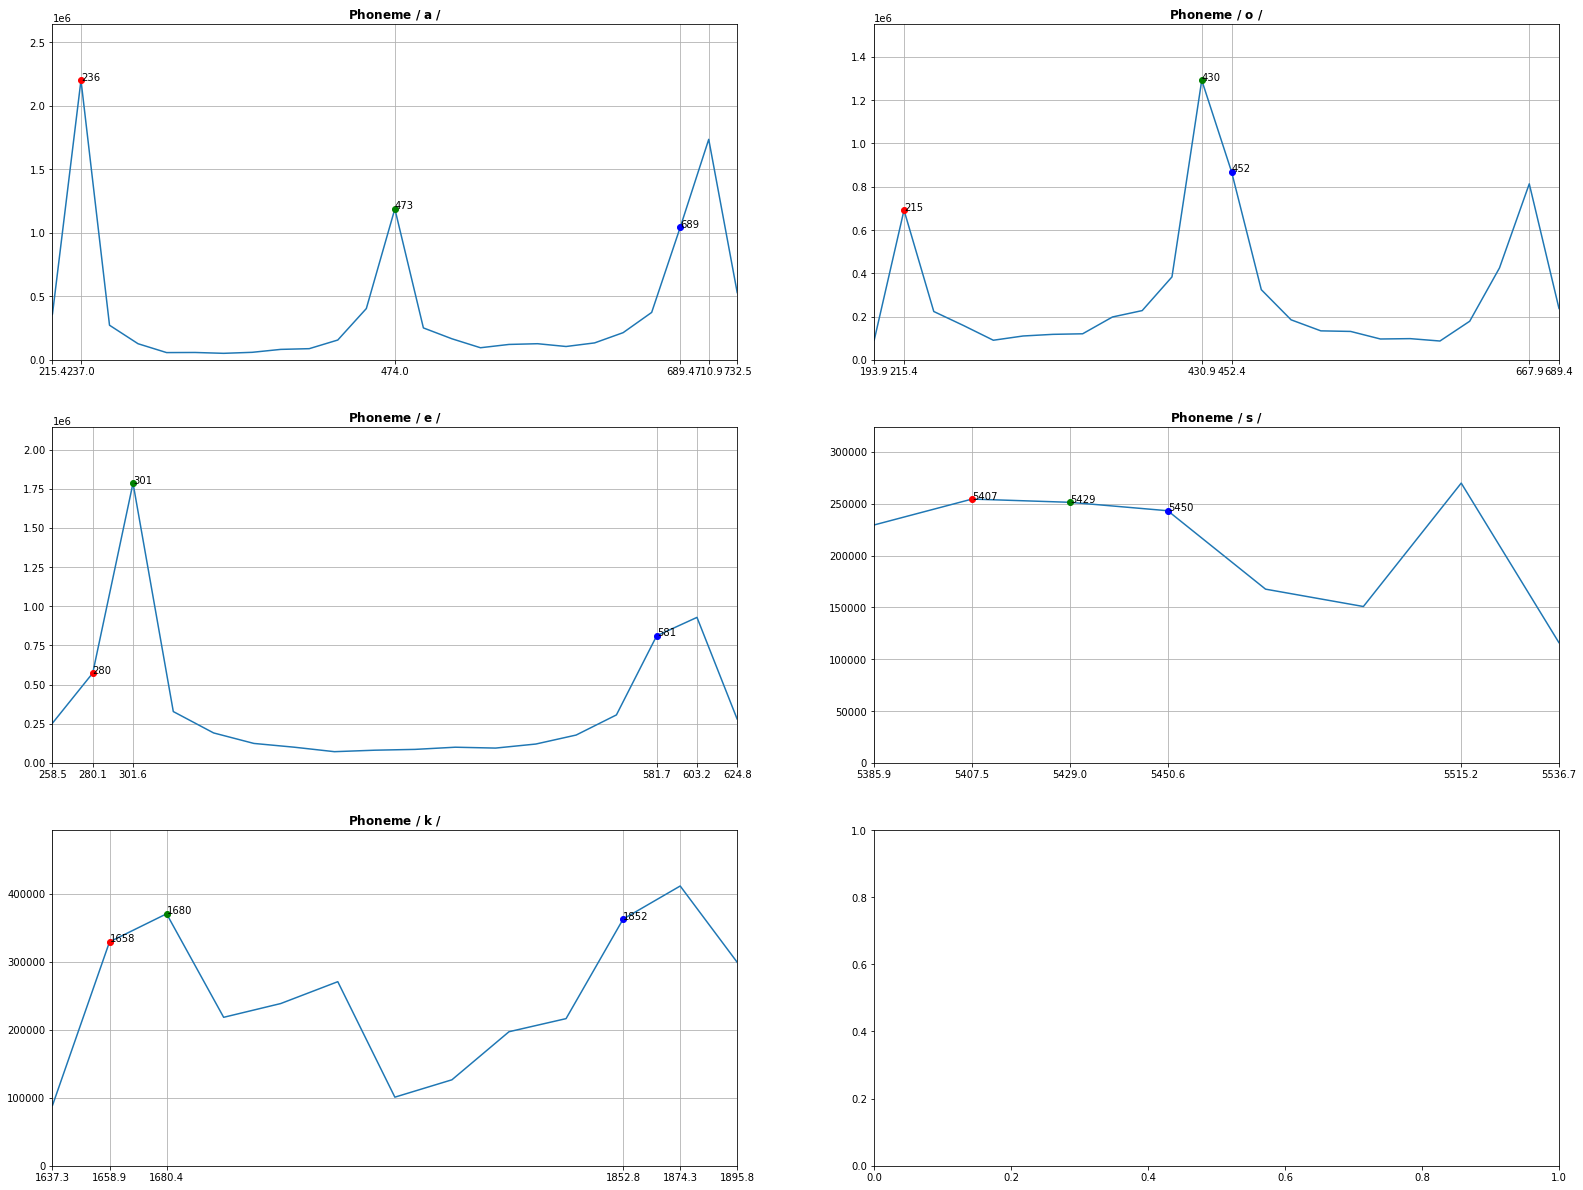

In [35]:
sr_a, a = wf.read('./data/a_audio.wav')
sr_o, o = wf.read('./data/o_audio.wav')
sr_e, e = wf.read('./data/e_audio.wav')
sr_s, s = wf.read('./data/s_audio.wav')
sr_k, k = wf.read('./data/k_audio.wav')

fs = 44100
power_of_2 = 11
time_steps = 2**power_of_2
# time_steps = 4410

fft_a = np.fft.fft( a[:time_steps,0] )
fft_o = np.fft.fft( o[:time_steps,0] )
fft_e = np.fft.fft( e[:time_steps,0] )
fft_s = np.fft.fft( s[:time_steps,0] )
fft_k = np.fft.fft( k[:time_steps,0] )

# print(len(freq_bins))
mag_a = np.sqrt( np.power( fft_a.real , 2 ) + np.power( fft_a.imag , 2 ) )
mag_a = mag_a[:time_steps//2]

mag_o = np.sqrt( np.power( fft_o.real , 2 ) + np.power( fft_o.imag , 2 ) )
mag_o = mag_o[:time_steps//2]

mag_e = np.sqrt( np.power( fft_e.real , 2 ) + np.power( fft_e.imag , 2 ) )
mag_e = mag_e[:time_steps//2]

mag_s = np.sqrt( np.power( fft_s.real , 2 ) + np.power( fft_s.imag , 2 ) )
mag_s = mag_s[:time_steps//2]

mag_k = np.sqrt( np.power( fft_k.real , 2 ) + np.power( fft_k.imag , 2 ) )
mag_k = mag_k[:time_steps//2]

mag_list = [mag_a,mag_o,mag_e,mag_s,mag_k]

freq_bins = np.linspace(0,fs,time_steps)
freq_bins = freq_bins[:time_steps//2]

# freq_bins_o = np.linspace(0,fs,time_steps)
# freq_bins_o = freq_bins_a[:time_steps//2]

# freq_bins_e = np.linspace(0,fs,time_steps)
# freq_bins_e = freq_bins_a[:time_steps//2]

# freq_bins_s = np.linspace(0,fs,time_steps)
# freq_bins_s = freq_bins_a[:time_steps//2]

# freq_bins_k = np.linspace(0,fs,time_steps)
# freq_bins_k = freq_bins_a[:time_steps//2]

# print(max(mag_a), max(freq_bins_a), len(mag_a),len(freq_bins_a))

# plt.plot( np.arange( fft_a.size )/fft_a.size*sr_original , fft_a.real )

# frame_to_plot = int(time_steps/2)
# frame_to_plot = time_steps

phonemes = ['a', 'o', 'e', 's', 'k']

fig, plots = plt.subplots(3,2,figsize=(27,21))#, sharex=True)
counter=0
for i in range(3):
    for j in range(2):
        if counter==5:
            break
        
        mag_signal = mag_list[counter]
        
        plots[i,j].grid(True)
        plots[i,j].title.set_text(r"$\bf{2^{%d} = %d\ bins}$"%(power_of_2,time_steps))
        plots[i,j].plot( freq_bins , mag_signal )
#         ax1, = plots[i,j].plot( 0*freq_bins_signal + f1, freq_bins_signal, "r", label='$f_1=%dHz$'%(f1) )
#         ax2, = plots[i,j].plot( 0*freq_bins_signal + f2, freq_bins_signal, "g", label='$f_2=%dHz$'%(f2) )
        
        
#         pos = np.where(freq_bins_signal>min(f1,f2)//2) 
#         pos2 = np.where(freq_bins_signal<max(f1,f2))
#         plots[i,j].set_xticks(pos)

        #bins of max magnitude (first 4)
        mag_signal_values = np.sort(mag_signal)
#         print(mag_signal_values)
        bins_max_mag = [i for i in range(mag_signal.size) if mag_signal[i] in mag_signal_values[-4:]]
        print(bins_max_mag)
        
#         f1_closest_index = min(range(len(freq_bins_signal)), key=lambda i: abs(freq_bins_signal[i]-f1))
#         print(f1_closest_index, freq_bins_signal[f1_closest_index])
    
#         f2_closest_index = min(range(len(freq_bins_signal)), key=lambda i: abs(freq_bins_signal[i]-f2))
#         print(f2_closest_index, freq_bins_signal[f2_closest_index])
    
        x_axis_to_plot = []
        x_axis_to_plot.extend(bins_max_mag)
        x_axis_to_plot.append(bins_max_mag[0]-1)
        x_axis_to_plot.append(bins_max_mag[-1]+1)
#         print(x_axis_to_plot,len(x_axis_to_plot))
        
        x_values_to_plot = []
        x_values_to_plot.extend(freq_bins[x_axis_to_plot].tolist())
        x_values_to_plot.sort()
        print(x_values_to_plot)
    
        plots[i,j].set_xlim(x_values_to_plot[0], x_values_to_plot[-1])#freq_bins_signal[x_axis_to_plot[-1]])
        plots[i,j].set_ylim(0,1.2*max(mag_signal))
        plots[i,j].set_xticks(x_values_to_plot)
        
        #plot points
        f1,f2,f3 = mag_signal_values[-3:]
        print(freq_bins[bins_max_mag[1]])
        p_f1, = plots[i,j].plot(freq_bins[bins_max_mag[0]] , mag_signal[bins_max_mag[0]], "ro")#, label="$f_1\ bin$" )
        p_f2, = plots[i,j].plot(freq_bins[bins_max_mag[1]] , mag_signal[bins_max_mag[1]], "go")#, label="$f_2\ bin$" )
        p_f3, = plots[i,j].plot(freq_bins[bins_max_mag[2]] , mag_signal[bins_max_mag[2]], "bo")#, label="$f_3\ bin$" )

        
        x = [freq_bins[bins_max_mag[0]], freq_bins[bins_max_mag[1]], freq_bins[bins_max_mag[2]]]
        y = [mag_signal[bins_max_mag[0]], mag_signal[bins_max_mag[1]], mag_signal[bins_max_mag[2]]]
        
        points = [freq_bins[bins_max_mag[0]], freq_bins[bins_max_mag[1]], freq_bins[bins_max_mag[2]]]
        
        for k, freq in enumerate(points):
            plots[i,j].annotate(int(freq), (x[k], y[k]))
        
        phoneme = phonemes[counter]
        plots[i,j].title.set_text(r"$\bf{Phoneme\ /\ %s\ / }$"%(phoneme))

        
        counter+=1
        
       
        
# fig.legend(handles=[p_f1,p_f2,p_f3])    
       









# fig, plots = plt.subplots(3,2,figsize=(21,12))#, sharex=True)
# # fig.text(0.05,0.5, "Amplitude", ha="center", va="center", rotation=90)
# # plt.xlabel("Frequency")

# plots[0,0].grid(True)
# plots[0,0].title.set_text(r"$\bf{Phoneme\ /\ a\ / }$")
# plots[0,0].plot( freq_bins_a , mag_a)
# plots[0,0].set_xlim(0,len(mag_a[:frame_to_plot]))

# plots[0,1].grid(True)
# plots[0,1].title.set_text(r"$\bf{Phoneme\ /\ o\ / }$")
# plots[0,1].plot( freq_bins_o[:frame_to_plot] , mag_o[:frame_to_plot])
# plots[0,1].set_xlim(0,len(mag_o[:frame_to_plot]))

# plots[1,0].grid(True)
# plots[1,0].title.set_text(r"$\bf{Phoneme\ /\ e\ / }$")
# plots[1,0].plot( freq_bins_e[:frame_to_plot] , mag_e[:frame_to_plot])
# plots[1,0].set_xlim(0,len(mag_e[:frame_to_plot]))

# plots[1,1].grid(True)
# plots[1,1].title.set_text(r"$\bf{Phoneme\ /\ s\ / }$")
# plots[1,1].plot( freq_bins_s[:frame_to_plot] , mag_s[:frame_to_plot])
# plots[1,1].set_xlim(0,len(mag_s[:frame_to_plot]))

# plots[2,0].grid(True)
# plots[2,0].title.set_text(r"$\bf{Phoneme\ /\ k\ / }$")
# plots[2,0].plot( freq_bins_k[:frame_to_plot] , mag_k[:frame_to_plot])
# plots[2,0].set_xlim(0,len(mag_k[:frame_to_plot]))

<h2>Test</h2>

In [3]:
freqs_a = np.fft.fftfreq(len(fft_a))
print(np.where(fft_a==max(fft_a)))
print(max(abs(freqs_a * fs)))

# sv = np.abs(fft_a * np.conj(fft_a))

# freq_a = np.fft.fftfreq(len(sv))
# print(type(sv))
# test = int( len(sv) / 2 - 1)
# maax = np.argmax(sv[1:test], axis=0)
# print(freq_a[maax])

(array([33]),)
22050.0


<h2>Task 2A - 2B</h2>

2^(9) = 512 bins
2^(10) = 1024 bins
2^(11) = 2048 bins
2^(12) = 4096 bins
2^(13) = 8192 bins
2^(14) = 16384 bins


Text(0.5, 0.98, '$\\bf{Sample\\ Rate: 44100Hz}$')

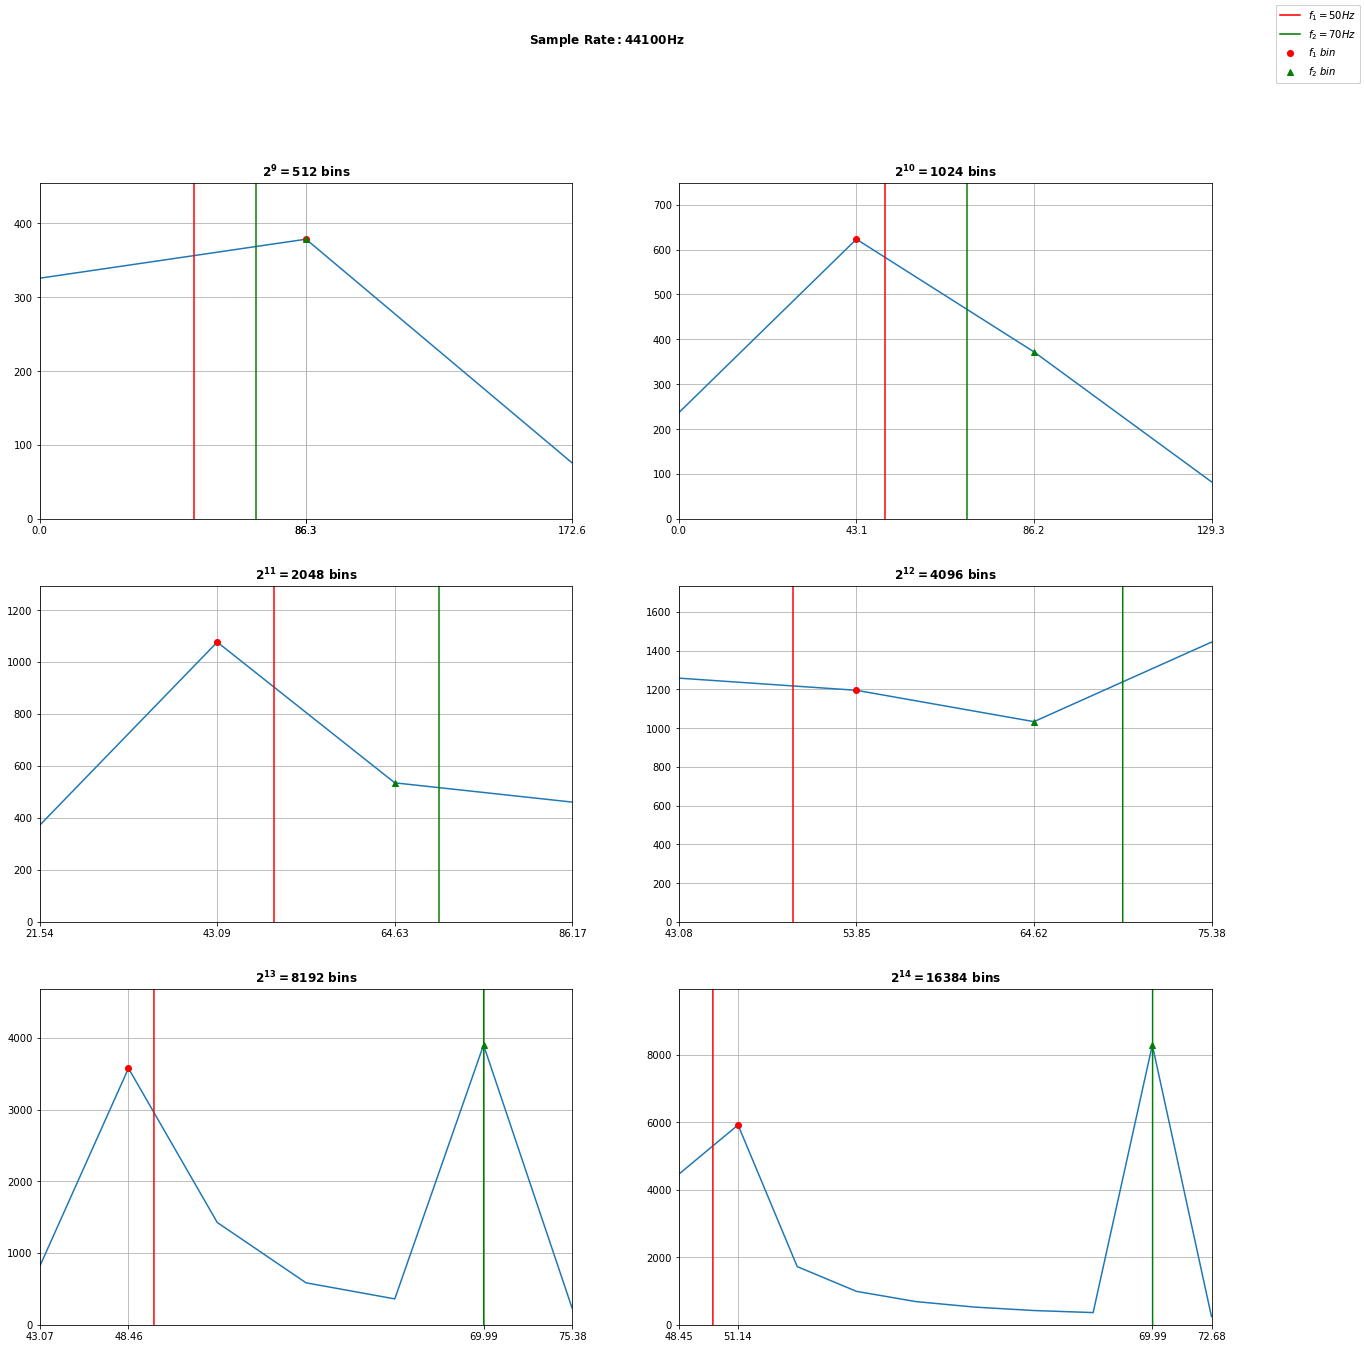

In [186]:
fs = 44100
f1 = 50 
f2 = 70

# frame_to_plot = int(time_steps/4)
# frame_to_plot = 5*max(f1,f2)

fig, plots = plt.subplots(3,2,figsize=(21,21))#, sharex=True)
# fig.text(0.05,0.5, "Amplitude", ha="center", va="center", rotation=90)
# plt.xlabel("Frequency")

if fs==44100//4:
    power_of_2 = 7
elif fs==44100//2:
    power_of_2 = 8
else:
    power_of_2 = 9

for i in range(3):
    for j in range(2):
        
        time_steps = 2**power_of_2
        t = np.arange(time_steps)/fs
        s1 = np.sin( 2*np.pi*f1*t ) 
        s2 = np.sin( 2*np.pi*f2*t ) 
        signal = s1 + s2

        fft_signal = np.fft.fft( signal )
        mag_signal = np.sqrt( np.power( fft_signal.real , 2 ) + np.power( fft_signal.imag , 2 ) )
        mag_signal = mag_signal[:time_steps//2]
        freq_bins_signal = np.linspace(0,fs,time_steps)
        freq_bins_signal = freq_bins_signal[:time_steps//2]
#         print(len(freq_bins_signal),len(mag_signal))
        print("2^(%d) = %d bins"%(power_of_2,time_steps))
#         print(max(mag_s), max(freq_bins_s), len(mag_s),len(freq_bins_s))
    
#         x_axis = 
    
        plots[i,j].grid(True)
        plots[i,j].title.set_text(r"$\bf{2^{%d} = %d\ bins}$"%(power_of_2,time_steps))
        plots[i,j].plot( freq_bins_signal , mag_signal )
        ax1, = plots[i,j].plot( 0*freq_bins_signal + f1, freq_bins_signal, "r", label='$f_1=%dHz$'%(f1) )
        ax2, = plots[i,j].plot( 0*freq_bins_signal + f2, freq_bins_signal, "g", label='$f_2=%dHz$'%(f2) )
        
        
#         pos = np.where(freq_bins_signal>min(f1,f2)//2) 
#         pos2 = np.where(freq_bins_signal<max(f1,f2))
#         plots[i,j].set_xticks(pos)

        #bins of max magnitude (first 4)
        mag_signal_values = np.sort(mag_signal)[::-1]
#         print(mag_signal_values)
        bins_max_mag = [i for i in range(mag_signal.size) if mag_signal[i] in mag_signal_values[:4]]
#         print(bins_max_mag)
        
        f1_closest_index = min(range(len(freq_bins_signal)), key=lambda i: abs(freq_bins_signal[i]-f1))
#         print(f1_closest_index, freq_bins_signal[f1_closest_index])
    
        f2_closest_index = min(range(len(freq_bins_signal)), key=lambda i: abs(freq_bins_signal[i]-f2))
#         print(f2_closest_index, freq_bins_signal[f2_closest_index])
    
        x_axis_to_plot = [ f1_closest_index-1, f1_closest_index, f2_closest_index, f2_closest_index+1]
#         print(len(x_axis_to_plot)
        x_values_to_plot = []
        x_values_to_plot.extend(freq_bins_signal[x_axis_to_plot].tolist())
#         x_values_to_plot.append(f1)
#         x_values_to_plot.append(f2)
#         print(x_values_to_plot)
        plots[i,j].set_xlim(x_values_to_plot[0],x_values_to_plot[-1])#freq_bins_signal[x_axis_to_plot[-1]])
        plots[i,j].set_ylim(0,1.2*max(mag_signal))
        plots[i,j].set_xticks(x_values_to_plot)
        
        #plot points
#         print( freq_bins_signal[f1_closest_index],mag_signal[f1_closest_index])
        p_f1, = plots[i,j].plot(freq_bins_signal[f1_closest_index] , mag_signal[f1_closest_index], "ro", label="$f_1\ bin$" )
        p_f2, = plots[i,j].plot(freq_bins_signal[f2_closest_index] , mag_signal[f2_closest_index], "g^", label="$f_2\ bin$" )
    
        
        fig.legend(handles=[ax1,ax2,p_f1,p_f2])
        
        power_of_2 += 1
        
fig.suptitle(r"$\bf{Sample\ Rate: %dHz}$"%(fs))



<h2>Task 3</h2>

In [36]:
import librosa
import librosa.display

fs = 44100
my_hop_length = 1024
fft_window = 2048

sr_a, a = wf.read('./data/smurfs.wav')
# sr_o, o = wf.read('./data/o_audio.wav')
# sr_e, e = wf.read('./data/e_audio.wav')
# sr_s, s = wf.read('./data/s_audio.wav')
# sr_k, k = wf.read('./data/k_audio.wav')
# print(a.ndim)
if (a.ndim)>1:
    a = a[:,0]/ np.max ( np.abs(a) )
else:  
    a = a / np.max ( np.abs(a) )
    
# print(a)


<ipython-input-36-df84e2e16c21>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr_a, a = wf.read('./data/smurfs.wav')


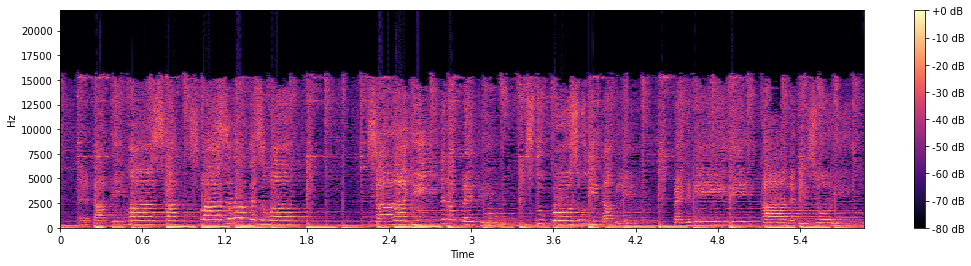

In [66]:
#unfiltered audio
# low pass frequency domain filter
audio_fft = librosa.stft(a, fft_window, my_hop_length)
# cut all frequencies above bin 50
db_fft = librosa.amplitude_to_db( np.abs(audio_fft), ref=np.max )

#plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img = librosa.display.specshow(db_fft, sr=fs, x_axis='time', y_axis='linear', ax = ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

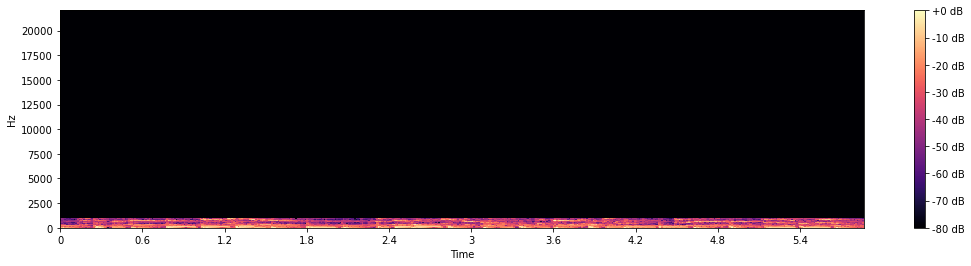

In [67]:
#filtered audio - low pass
audio_fft_low = np.copy(audio_fft)
audio_fft_low[50:, :] = 0
db_fft_low = librosa.amplitude_to_db( np.abs(audio_fft_low), ref=np.max )
audio_ifft_low = librosa.istft(audio_fft_low, hop_length=my_hop_length)

#plot
fig, ax_low = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_low = librosa.display.specshow(db_fft_low, sr=fs, x_axis='time', y_axis='linear', ax = ax_low)
fig.colorbar(img, ax=ax_low, format="%+2.f dB")

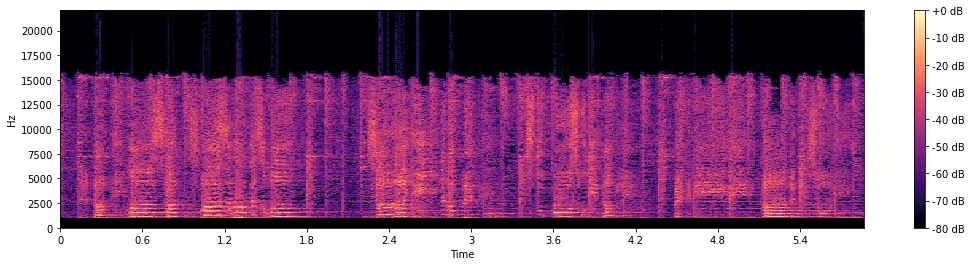

In [68]:
#filtered audio - high pass
audio_fft_high = np.copy(audio_fft)
audio_fft_high[:50, :] = 0
db_fft_high = librosa.amplitude_to_db( np.abs(audio_fft_high), ref=np.max )
audio_ifft_high = librosa.istft(audio_fft_high, hop_length=my_hop_length)

#plot
fig, ax_high = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_high = librosa.display.specshow(db_fft_high, sr=fs, x_axis='time', y_axis='linear', ax = ax_high)
fig.colorbar(img_high, ax=ax_high, format="%+2.f dB")

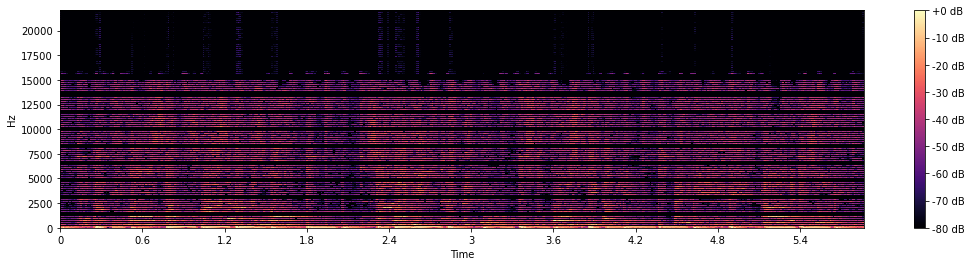

In [104]:
#filtered audio - experimenting vol.1
audio_fft_exp = np.copy(audio_fft)
# print(audio_fft_exp.shape[0])
for i in range(1,audio_fft_exp.shape[0]):
    audio_fft_exp[10*i:10*i+6, :] = 0

db_fft_exp = librosa.amplitude_to_db( np.abs(audio_fft_exp), ref=np.max )
audio_ifft_exp = librosa.istft(audio_fft_exp, hop_length=my_hop_length)

#plot
fig, ax_exp = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_exp = librosa.display.specshow(db_fft_exp, sr=fs, x_axis='time', y_axis='linear', ax = ax_exp)
fig.colorbar(img_exp, ax=ax_exp, format="%+2.f dB")

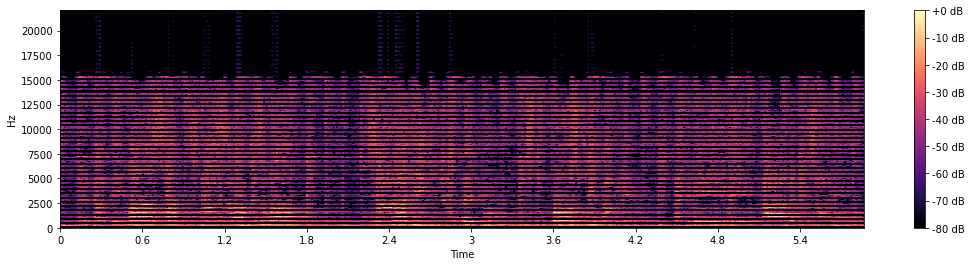

In [195]:
#filtered audio - experimenting vol.2
audio_fft_exp2 = np.copy(audio_fft)
# print(audio_fft_exp.shape[0])

for i in range(0,audio_fft_exp.shape[0]):
    audio_fft_exp2[20*i:20*i+10, :] = 0

# audio_fft_exp2[audio_fft_exp2.shape[0]//4:, :] = 0

db_fft_exp2 = librosa.amplitude_to_db( np.abs(audio_fft_exp2), ref=np.max )
audio_ifft_exp2 = librosa.istft(audio_fft_exp2, hop_length=my_hop_length)

#plot
fig, ax_exp2 = plt.subplots(nrows=1, ncols=1, figsize=(18,4))
img_exp2 = librosa.display.specshow(db_fft_exp2, sr=fs, x_axis='time', y_axis='linear', ax = ax_exp2)
fig.colorbar(img_exp2, ax=ax_exp2, format="%+2.f dB")

In [177]:
start = (a.shape[0]//4) +50000
stop = start + 4410*45

print(f"0.{start//fs}sec - 0.{stop//fs}sec")

0.4sec - 0.8sec


In [190]:
#play unfiltered audio
sd.play( a[start:stop] , 44100 )
sd.wait()

In [194]:
#play filtered audio - low pass
sd.play( audio_ifft_low[start:stop] , 44100 )
sd.wait()

In [180]:
#play filtered audio - high pass
sd.play( audio_ifft_high[start:stop] , 44100 )
sd.wait()

In [197]:
#play filtered audio - experiment 1
sd.play( audio_ifft_exp[start:stop] , 44100 )
sd.wait()

In [196]:
#play filtered audio - experiment 2
sd.play( audio_ifft_exp2[start:stop] , 44100 )
sd.wait()

<h2>Testing (ignore)</h2>

In [ ]:


# t=np.arange(fs)/fs
# steps_to_plot = len(a)//4
# #unfiltered audio
# fft_a = np.fft.fft( a )
# fig, plots = plt.subplots(1,1,figsize=(18,4))#, sharex=True)
# plots.grid(True)
# plots.plot(t[:steps_to_plot],a[:steps_to_plot])
# sd.play(a,fs)
# sd.wait()

# #filtered audio
# custom_filt =  np.ones(fft_a.shape[0])
# custom_filt[1000:] = 0
# print(custom_filt.shape)
# print(fft_a.shape)
# fft_a_test = fft_a*custom_filt
# print(fft_a_test.shape)
# # fft_a = np.zeros()
# # fft_a_test=fft_a

# ifft_a = np.fft.ifft( fft_a_test )
# fig, plots = plt.subplots(1,1,figsize=(18,4))#, sharex=True)
# plots.grid(True)
# plots.plot(t[:steps_to_plot], ifft_a[:steps_to_plot])
# sd.play(ifft_a.real,fs)
# sd.wait()



<h2>More material</h2>

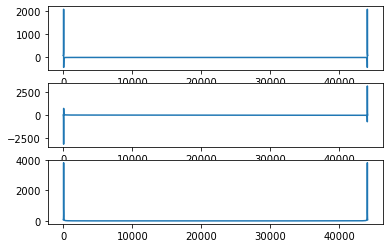

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 11 16:45:11 2020

@author: user
"""

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import librosa



fs = 44100
t = np.arange(8096)/fs
freq = 50
x = np.sin( 2*np.pi*freq*t )

w = np.hanning( 8096 )

y = np.fft.fft( x )

frequency_bins = np.arange( y.size )/y.size*fs

plt.plot( np.arange(8096) , w )
plt.plot( np.arange(8096) , x )
plt.plot( np.arange(8096) , w*x )

plt.subplot(311)
plt.plot( frequency_bins , y.real )
plt.subplot(312)
plt.plot( frequency_bins , y.imag )
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(313)
plt.plot( frequency_bins , mag )

# fs = 44100
# x, sr = librosa.load('audio_files/sofianos/eipa.wav', sr=fs)

# sd.play( x[:4410], sr )
# plt.plot( np.arange(4410), x[:4410] )